In [1]:
##  1. downloading dataset and importing required libraries 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
data = df = pd.read_csv('course_review.csv')

In [4]:
df

,teaching,teaching_review,coursecontent,coursecontent_review,Examination,Examination_review,labwork,labwork_review,library_facilities,library_facilities_review,extracurricular,extracurricular_review
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...
...,...,...,...,...,...,...,...,...,...,...,...,...
180,1,intraction is good and leacture delivery also ...,0.0,every one can tell depth of course but some on...,NaN,exam pattern is good and marks distribution is...,1,all labs and practical going on well,NaN,good,1,they all are held in super
181,1,all the given terms are good regarding the uni...,1.0,we are getting maximum knowledge,1.0,all are good,1,not bad,-1.0,library facilities are not good.They are not f...,1,good
182,1,All the terms are good regarding the universit...,1.0,Knowledge is maximum gained by reading books ...,0.0,The examination pattern is good .But time is n...,1,Labs are upto the mark.,1.0,They are good,1,the extracurricular activities held in univers...
183,-1,Some of the teacher are un experienced. Also t...,0.0,Its fine but it should focus more towards prac...,1.0,MCQ pattern is quite good and efficient way fo...,-1,Our labs do not have all facalities.,1.0,We have a good library with all facalities.,1,Our university has lot of extracurricular goin...


In [5]:
## 2. Data Cleaning & Preparation

In [6]:
# Standardizing column names (spaces)
df.rename(columns={ ' library_facilities_review': 'library_facilities_review'
}, inplace=True)

In [7]:
# Identify Numeric and Text columns
rating_cols = ['teaching', 'coursecontent', 'Examination', 'labwork', 'library_facilities', 'extracurricular']
review_cols = ['teaching_review', 'coursecontent_review', 'Examination_review', 'labwork_review', 'library_facilities_review', 'extracurricular_review']

In [8]:
# Fill missing ratings with 0 (Neutral) and reviews with empty strings
df[rating_cols] = df[rating_cols].fillna(0)
for col in review_cols:
    df[col] = df[col].fillna('').astype(str).str.strip()

In [9]:
## 3. Analyze Ratings

In [10]:
# We count the frequency of -1 (Neg), 0 (Neu), and 1 (Pos) for each category
rating_summary = df[rating_cols].apply(pd.Series.value_counts).T.fillna(0)
rating_summary.columns = ['Negative (-1)', 'Neutral (0)', 'Positive (1)']
print("Rating Summary Table:")
print(rating_summary)

Rating Summary Table:
                    Negative (-1)  Neutral (0)  Positive (1)
teaching                       13           35           137
coursecontent                  30           27           128
Examination                    24           31           130
labwork                        37           16           132
library_facilities             31           27           127
extracurricular                12           19           154


In [11]:
## 4. NLP Sentiment Analysis

In [12]:
# Install necessary NLP libraries
!pip install textblob wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from textblob import TextBlob

In [14]:
# We'll calculate a sentiment score for every review text provided
def calculate_sentiment(text):
    if not text: return 0
    return TextBlob(text).sentiment.polarity

for col in review_cols:
    df[f'{col}_sentiment'] = df[col].apply(calculate_sentiment)

In [15]:
''' 1. If we have 500 students, we cannot read every single comment. By calculating the avg_sentiment, 
we can immediately filter your data to find the 10 most "Negative" students and 
read their specific complaints first. It helps us to prioritize where to make improvements.

2. Cleaning the "Noise" (The Buffer Zone)
In NLP, a score of 0.0 is perfectly neutral. However, sometimes a student might say something slightly positive like 
"It was okay," which might get a score of 0.05. By setting a threshold (the 0.1 and -0.1 limit), 
we ensure that only clearly positive or clearly negative comments are categorized as such. 
This makes your final report more accurate.'''

# Categorize the average sentiment per student
df['avg_sentiment'] = df[[f'{col}_sentiment' for col in review_cols]].mean(axis=1)
df['sentiment_category'] = df['avg_sentiment'].apply(lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   teaching                             185 non-null    int64  
 1   teaching_review                      185 non-null    object 
 2   coursecontent                        185 non-null    float64
 3   coursecontent_review                 185 non-null    object 
 4   Examination                          185 non-null    float64
 5   Examination_review                   185 non-null    object 
 6   labwork                              185 non-null    int64  
 7   labwork_review                       185 non-null    object 
 8   library_facilities                   185 non-null    float64
 9   library_facilities_review            185 non-null    object 
 10  extracurricular                      185 non-null    int64  
 11  extracurricular_review          

In [17]:
df.describe()

,teaching,coursecontent,Examination,labwork,library_facilities,extracurricular,teaching_review_sentiment,coursecontent_review_sentiment,Examination_review_sentiment,labwork_review_sentiment,library_facilities_review_sentiment,extracurricular_review_sentiment,avg_sentiment
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.670270,0.529730,0.572973,0.513514,0.518919,0.767568,0.522077,0.412893,0.491923,0.444080,0.473674,0.536652,0.480217
std,0.602921,0.759314,0.711951,0.808300,0.766782,0.556608,0.323933,0.375881,0.392378,0.386523,0.376973,0.351702,0.189051
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.910000,-0.700000,-0.910000,-0.910000,-0.350000,-0.400000,-0.083148
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.350000,0.000000,0.200000,0.200000,0.091667,0.275000,0.365509
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.700000,0.500000,0.700000,0.700000,0.700000,0.700000,0.493333
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.627778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000


In [18]:
## 5. Visualizations

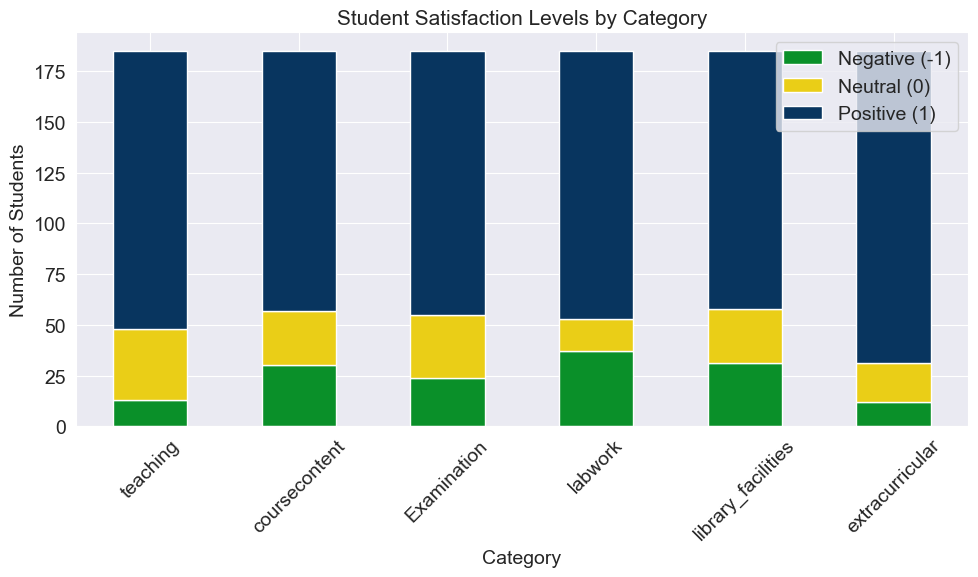

In [19]:
# Graph 1: Stacked Bar Chart for Ratings
rating_summary.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#0A9029','#EACE17','#08355F'])
plt.title('Student Satisfaction Levels by Category', fontsize=15)
plt.ylabel('Number of Students')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

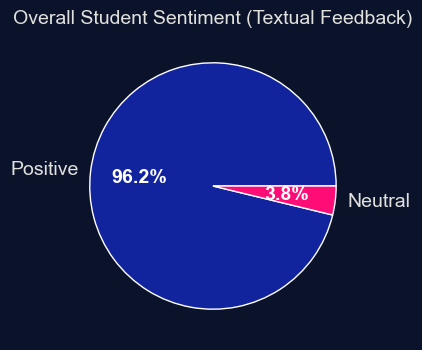

In [20]:
# Graph 2: Sentiment Distribution Pie Chart
plt.figure(figsize=(4,4), facecolor='#0B132B') # Match the dark background
text_color = '#E0E1DD'

# Capture 'texts' (category names) and 'autotexts' (percentages)
counts = df['sentiment_category'].value_counts()
patches, texts, autotexts = plt.pie(counts, labels=counts.index, autopct='%1.1f%%', 
                                    colors=['#12239E', '#FD0D75', '#66b3ff'],
                                    textprops={'color': text_color})

# Styling the percentage labels specifically
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

plt.title('Overall Student Sentiment (Textual Feedback)', color=text_color, fontsize=14)
plt.show()

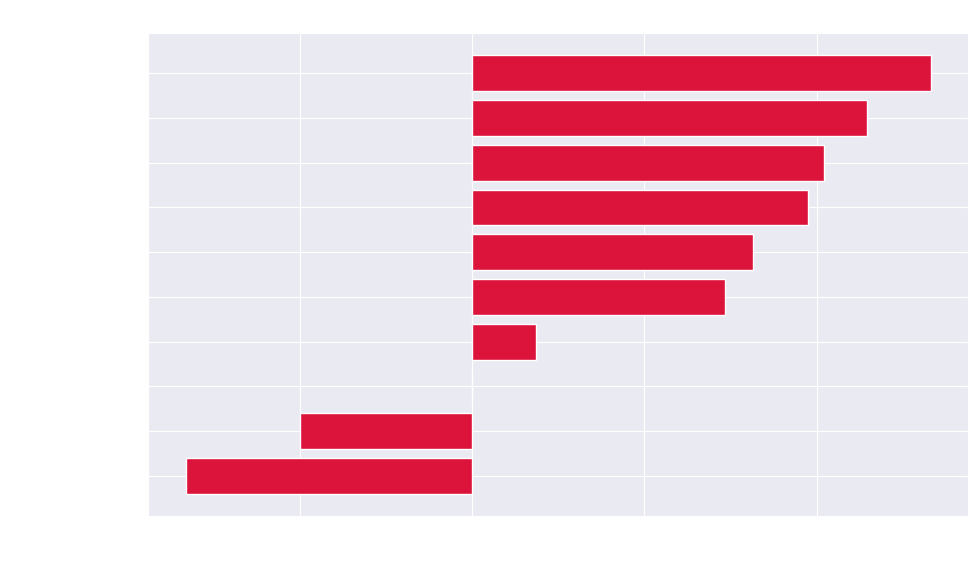

In [21]:
# Graph 3: 10 Most Negative Students (10 lowest avg_sentiment)
neg_10 = df.nsmallest(10, 'avg_sentiment')
neg_10['label'] = [f'Student {i}' for i in neg_10.index]

# Plotting
plt.barh(neg_10['label'], neg_10['avg_sentiment'], color='crimson')

# Simple Axis Styling
plt.title('Top 10 Most Negative Students', color='white')
plt.xlabel('Sentiment Score', color='white')
plt.ylabel('Student ID', color='white')
plt.tick_params(axis='both', colors='white')

plt.tight_layout()
plt.show()

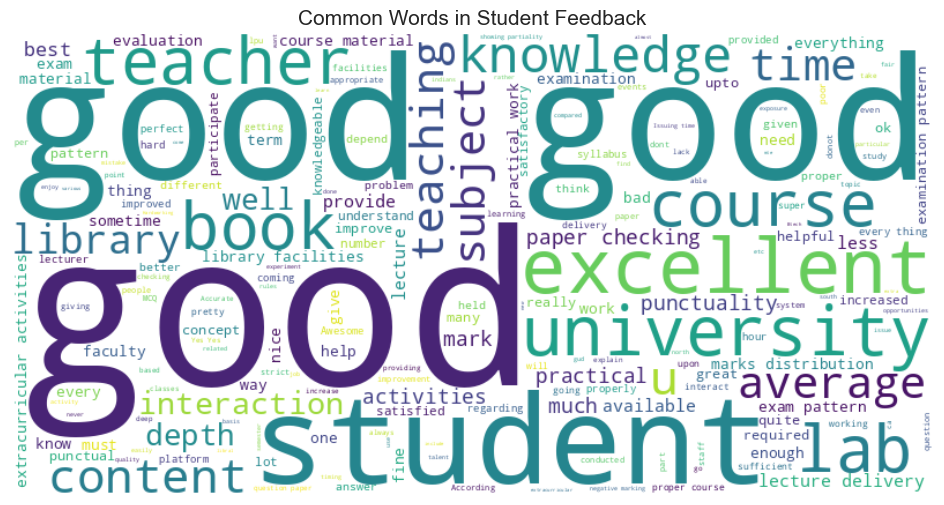

In [22]:
# Graph 4: Word Cloud of Feedback
from wordcloud import WordCloud 
all_reviews = " ".join(df[review_cols].values.flatten())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Student Feedback', fontsize=15)
plt.show()

In [23]:
## 6. Improvements for future 
'''
#Area	  #Pain Point	                  #Suggested Technique
Labs	  Broken/Missing Equipment	      Monthly audits & Cloud storage
Exams	  Lack of Transparency	          Answer key release & automated feedback
Library	  Low Book Stock	              Digital library expansion & pre-booking app
Teaching  Lack of Depth	                  Interactive case-studies & mid-term feedback
Events	  Timing Conflicts	              Universal free slots for activities             '''


'\n#Area\t  #Pain Point\t                  #Suggested Technique\nLabs\t  Broken/Missing Equipment\t      Monthly audits & Cloud storage\nExams\t  Lack of Transparency\t          Answer key release & automated feedback\nLibrary\t  Low Book Stock\t              Digital library expansion & pre-booking app\nTeaching  Lack of Depth\t                  Interactive case-studies & mid-term feedback\nEvents\t  Timing Conflicts\t              Universal free slots for activities             '

In [24]:
## 7. Save the processed results
df.to_csv('analyzed_student_feedback.csv', index=False)
print("Analysis complete! The file 'analyzed_student_feedback.csv' is ready for download.")

Analysis complete! The file 'analyzed_student_feedback.csv' is ready for download.
